In [19]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import json
from PIL import Image
import numpy as np
import openai

In [20]:
road_model = load_model('../MODELS/road_signs.h5')
road_model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_48 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_23 (Flatten)        (None, 12544)             0         
                                                                 
 dense_46 (Dense)            (None, 128)               1605760   
                                                     

In [21]:
with open('../OTHER/classes.json', 'r') as f:
    data = json.load(f)
data

{'0': 'Speed limit (20km/h)',
 '1': 'Speed limit (30km/h)',
 '2': 'Speed limit (50km/h)',
 '3': 'Speed limit (60km/h)',
 '4': 'Speed limit (70km/h)',
 '5': 'Speed limit (80km/h)',
 '6': 'End of speed limit (80km/h)',
 '7': 'Speed limit (100km/h)',
 '8': 'Speed limit (120km/h)',
 '9': 'No passing',
 '10': 'No passing for vehicles over 3.5 metric tons',
 '11': 'Right-of-way at the next intersection',
 '12': 'Priority road',
 '13': 'Yield',
 '14': 'Stop',
 '15': 'No vehicles',
 '16': 'Vehicles over 3.5 metric tons prohibited',
 '17': 'No entry',
 '18': 'General caution',
 '19': 'Dangerous curve to the left',
 '20': 'Dangerous curve to the right',
 '21': 'Double curve',
 '22': 'Bumpy road',
 '23': 'Slippery road',
 '24': 'Road narrows on the right',
 '25': 'Road work',
 '26': 'Traffic signals',
 '27': 'Pedestrians',
 '28': 'Children crossing',
 '29': 'Bicycles crossing',
 '30': 'Beware of ice/snow',
 '31': 'Wild animals crossing',
 '32': 'End of all speed and passing limits',
 '33': 'Turn 

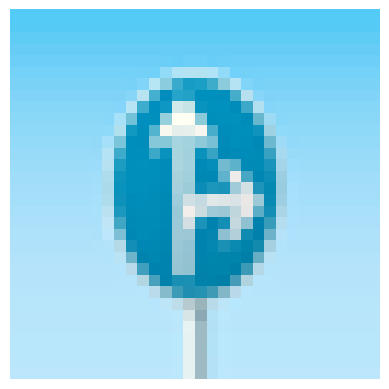

In [22]:
img = Image.open("../OTHER/sample_img.jpg")
img = img.resize((32, 32))
plt.imshow(img)
plt.axis('off')
plt.show()

In [23]:
prediction = data[str(np.argmax(road_model.predict(np.array(img).reshape(-1, 32, 32, 3))))]
prediction

1/1 [==============================] - 0s 53ms/step


'Go straight or right'

In [24]:
try:
  openai.api_key = input("Enter your OpenAI API key: ")
  message = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
          {"role": "system", "content": "You are a helpful assistant that gives users a description of a given road sign, and recommendations on what to do when they see it."},
          {"role": "user", "content": "What  should I do if I see a 65 mph sign"},
          {"role": "assistant", "content": "Keep your speed below 65 miles per  hour, as it will keep you safe."},
          {"role": "user", "content": "Tell me about this sign: " + prediction},
      ]
  )
  output = message.get('choices')[0]
  content = output.get('message')
  response = content.get('content') 
  print('This is the "' + prediction + '" sign. '  + response)
except:
  print("Invalid API Key.")

Invalid API Key.
